# A Small Experiment of PU Learning

This is to understanding how PU learning works in Multi-Class Outlier Detection cases


### Setup

In [ ]:
# This helps when you're loading functions defined in an external script (if the script is updated while the notebook is running)
%load_ext autoreload 
%autoreload 2

import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.decomposition import PCA
from math import sqrt
from sklearn.preprocessing import StandardScaler
import copy

import sys
sys.path.append("..")

from mypackage.data_models import generate_data_uniform_plus_normal 
from mypackage.PUL import compute_pu_scores, compute_pu_scores_intersection_two_step

## Data Generation

In [14]:
np.random.seed(42)
# Generate data
K = 2
dim = 20
means = [-1, 1]
radius= 5
a_signal= 8

# Training data
n_in_train = [1000,1000]

# Calibration data (Here callibrariton data has no effect if not using conformal inference)
n_in_cal = [1000,1000]

# Test data (Unlabeled Data)
n_in_test = [1000, 1000]
n_out_test = 200

# Data Generation
X_train, Y_train = generate_data_uniform_plus_normal(K, n_in_train, 0, dim=dim, means = means, radius=radius, a_signal=a_signal)
X_cal, Y_cal = generate_data_uniform_plus_normal(K, n_in_cal, 0, dim=dim, means = means, radius=radius, a_signal=a_signal)
X_test_part1, Y_test_part1 = generate_data_uniform_plus_normal(K, n_in_test, n_out_test, dim=dim, means = means, radius=radius, a_signal=a_signal)
X_test_part2, Y_test_part2 = generate_data_uniform_plus_normal(K, n_in_test, n_out_test, dim=dim, means = means, radius=radius, a_signal=a_signal)

### A standard two-step PU learning procedure function
this is a standard two step PU learning procedure dealing with guassian distributions, it contains the following steps:
1. Generate datas with three different distributions, namely type1_inliers, type2_inliers, outliers
2. Train a one class SVM on the positive training data, apply this SVM to a subset of unlabeled data, choose 10% reliable negative samples
3. Train a binary SVM on the positive training data and the reliable negative samples, apply this SVM to unlabeled test data and get the 10% samples as negative(outlier)

In [15]:
# Define machine learning models
from sklearn.svm import SVC, OneClassSVM
from sklearn.ensemble import RandomForestClassifier

binary_classifier = SVC(C=1, probability=True)
oneclass_classifier = OneClassSVM(gamma='auto')

# Compute conformity scores
scores_cal, scores_test = compute_pu_scores(K, X_train, Y_train, X_cal, Y_cal, X_test_part1, X_test_part2, binary_classifier, two_step=False, oneclass_classifier = oneclass_classifier)
scores_cal_two_step, scores_test_two_step = compute_pu_scores(K, X_train, Y_train, X_cal, Y_cal, X_test_part1, X_test_part2, binary_classifier, two_step=True, oneclass_classifier = oneclass_classifier)
scores_cal_intersection, scores_test_intersection = compute_pu_scores_intersection_two_step(K, X_train, Y_train, X_cal, Y_cal, X_test_part1, X_test_part2, binary_classifier, oneclass_classifier)

### Plot

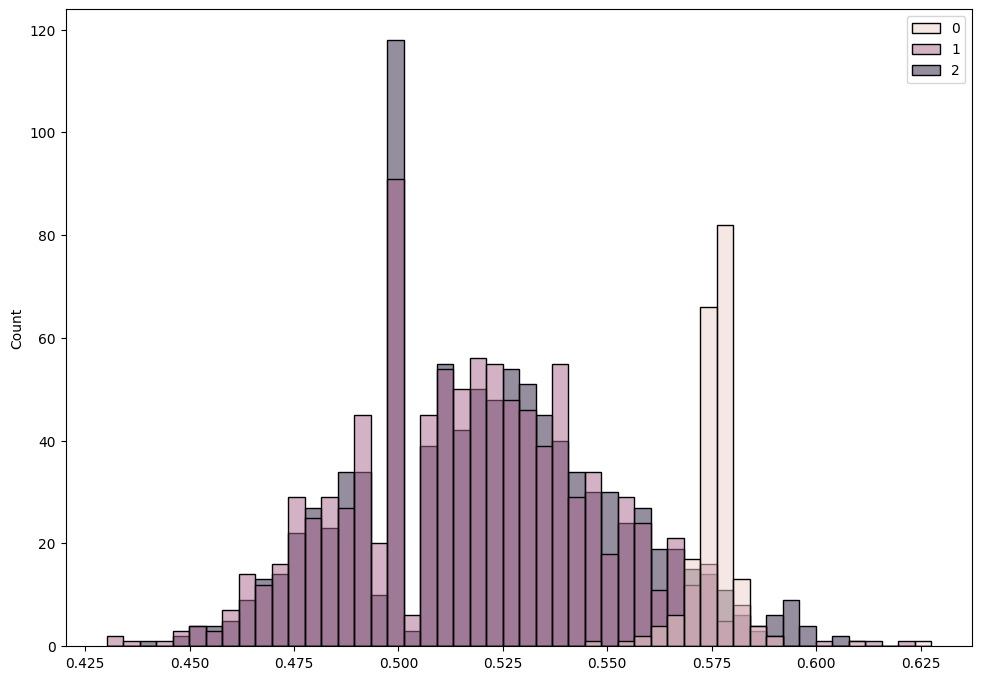

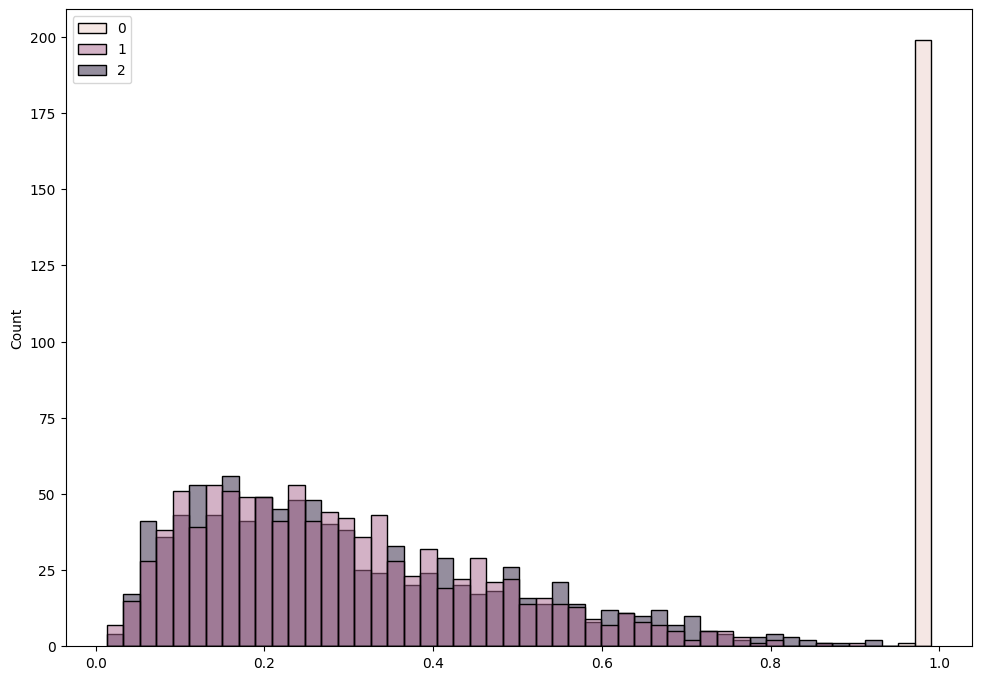

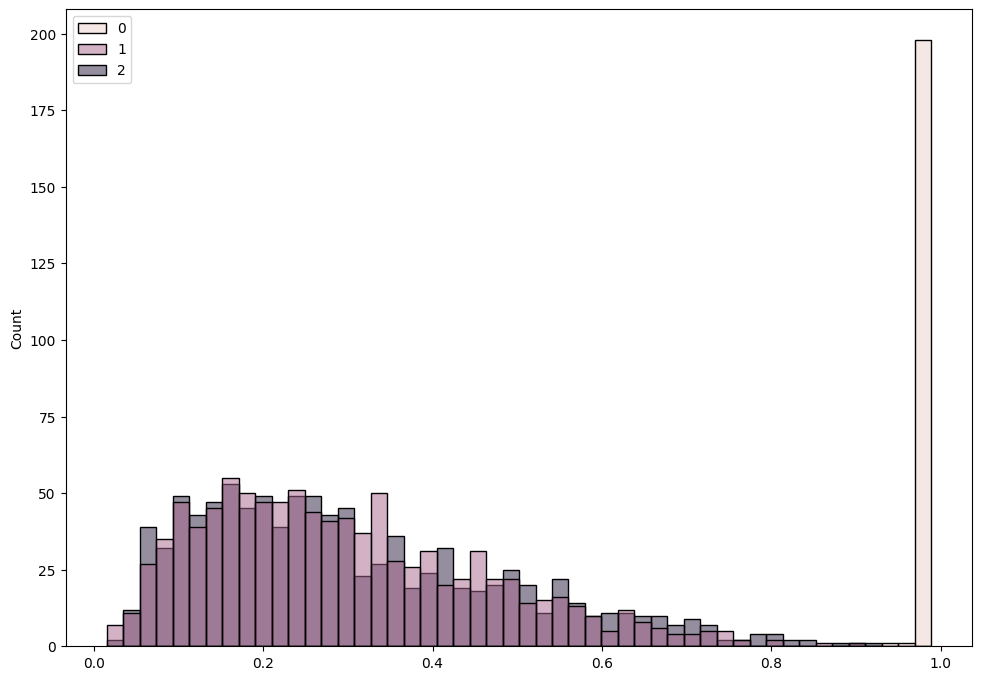

In [17]:
# Plot the conformity scores
rcParams['figure.figsize'] = 11.7,8.27

sns.histplot(x=scores_test, hue=Y_test_part2, bins=50)
plt.show()

sns.histplot(x=scores_test_two_step, hue=Y_test_part2, bins=50)
plt.show()

sns.histplot(x=scores_test_intersection, hue=Y_test_part2, bins=50)
plt.show()